In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_proteins_all = pd.read_csv("data/iNPH_data_protein_nonormalization.csv", index_col=[0])
df_proteins_median_all = pd.read_csv("data/iNPH_data_protein_median.csv", index_col=[0])

df_peptides_all = pd.read_csv("data/iNPH_data_peptide_nonormalization.csv", index_col=[0])
df_peptides_median_all = pd.read_csv("data/iNPH_data_peptide_median.csv", index_col=[0])

In [4]:
# Some values are defined as inf. They are replaced with NaN since no def for inf. exists as of now

df_proteins_all.replace([np.inf, -np.inf], np.nan, inplace=True)
df_proteins_median_all.replace([np.inf, -np.inf], np.nan, inplace=True)

In [5]:
# Extract lumbar and ventricular samples
df_proteins_ventricular = df_proteins_all[df_proteins_all["CSF_type"] == "V"]
df_proteins_lumbar = df_proteins_all[df_proteins_all["CSF_type"] == "L"]

df_proteins_ventricular_median = df_proteins_median_all[df_proteins_median_all["CSF_type"] == "V"]
df_proteins_lumbar_median = df_proteins_median_all[df_proteins_median_all["CSF_type"] == "L"]

# Remove all cols but proteins

df_proteins_ventricular = df_proteins_ventricular.loc[:,"P02768":]
df_proteins_lumbar = df_proteins_lumbar.loc[:, "P02768":]

df_proteins_ventricular_median = df_proteins_ventricular_median.loc[:,"P02768":]
df_proteins_lumbar_median = df_proteins_lumbar_median.loc[:,"P02768":]

df_proteins_all_prot = df_proteins_all.loc[:, "P02768":]

In [6]:
df_proteins_ventricular_zeros = df_proteins_ventricular.fillna(0)
df_proteins_lumbar_zeros = df_proteins_lumbar.fillna(0)

df_proteins_ventricular_median_zeros = df_proteins_ventricular_median.fillna(0)
df_proteins_lumbar_median_zeros = df_proteins_lumbar_median.fillna(0)

In [7]:
df_proteins_all_prot = pd.merge(df_proteins_all_prot, df_proteins_all[['TMT Set']], left_index=True, right_index=True, how='left')

In [10]:
missingness_per_group = df_proteins_all_prot.groupby('TMT Set').apply(lambda x: x.isnull().mean())

* Missingness imputation within TMT_Set?

<Axes: xlabel='TMT Set'>

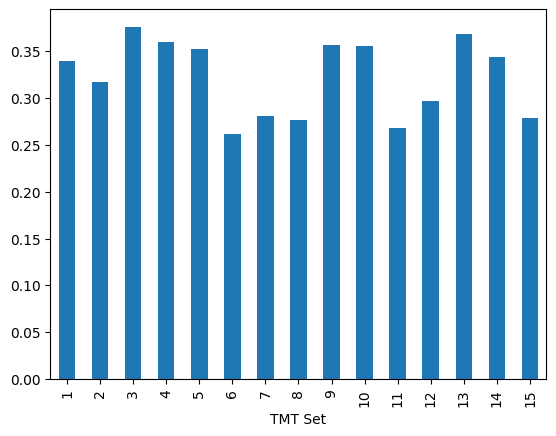

In [12]:
missingness_per_group.T.apply(lambda x: x.mean()).plot(kind="bar")

In [13]:
def plot_missingness_by_column(dataframe, column_to_group_by, n=10):
    """
    Plot n columns with the highest ratio of missing values based on a specific column.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - column_to_group_by (str): The column based on which to group and calculate missing value ratios.
    - n (int): Number of columns to plot. Default is 5.
    """
    # Calculate missing value ratios for each column grouped by the specified column
    missing_ratios_by_group = dataframe.groupby(column_to_group_by).apply(lambda x: x.isnull().mean())
    # Get the n columns with the highest missing value ratios for each group
    top_columns_by_group = missing_ratios_by_group.mean(axis=0).sort_values(ascending=False).index[:n]
    #print(top_columns_by_group)
    # Create a bar plot for each group
    plt.figure(figsize=(12, 6))
    for group in missing_ratios_by_group.items():
        sns.barplot(x=ratios[top_columns_by_group], y=top_columns_by_group, label=group)

    plt.title(f'Top {n} Columns with Highest Missing Value Ratios Grouped by {column_to_group_by}')
    plt.xlabel('Missing Value Ratio')
    plt.ylabel('Columns')
    plt.legend(title=column_to_group_by)
    plt.show()

In [17]:
def plot_columns_with_highest_missing_ratio(dataframe, n=5, plot_y_ticks = False):
    """
    Plot n columns with the highest ratio of missing values in the given DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - n (int): Number of columns to plot. Default is 5.
    """
    # Calculate missing value ratios for each column
    missing_ratios = dataframe.isnull().mean()

    # Sort columns based on missing value ratios in descending order
    sorted_columns = missing_ratios.sort_values(ascending=False).index[:n]

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_ratios[sorted_columns], y=sorted_columns, color='skyblue')
    if not plot_y_ticks:
        plt.yticks([])
    plt.title(f'Top {n} Columns with Highest Missing Value Ratios')
    plt.xlabel('Missing Value Ratio')
    plt.ylabel('Columns')
    plt.show()

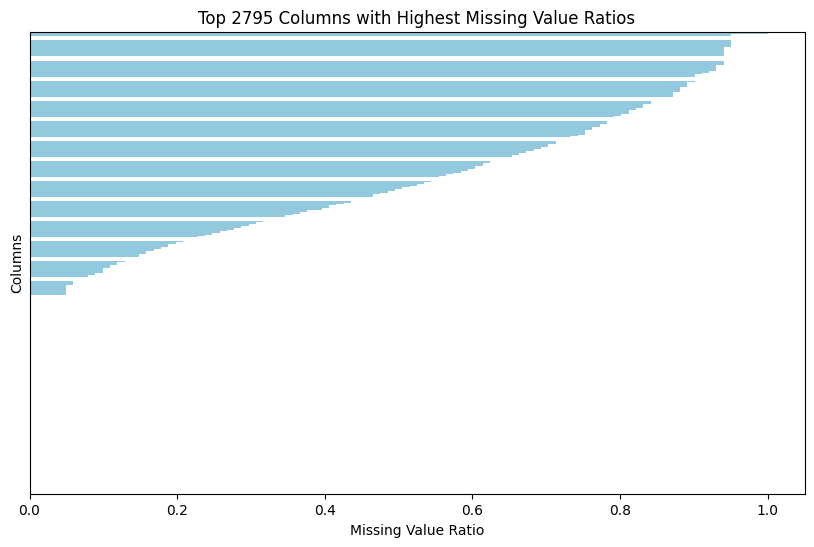

In [18]:
plot_columns_with_highest_missing_ratio(df_proteins_ventricular, df_proteins_ventricular.shape[1])

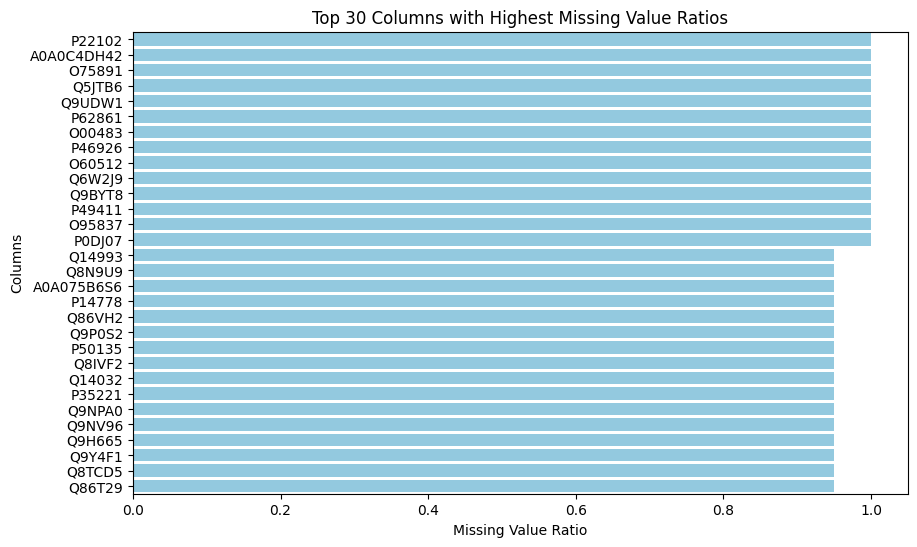

In [22]:
plot_columns_with_highest_missing_ratio(df_proteins_ventricular, 30, True)

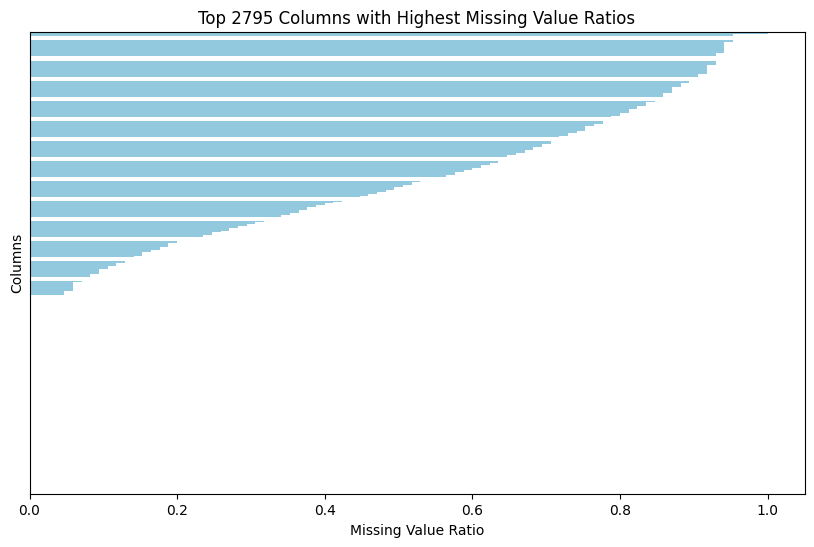

In [19]:
plot_columns_with_highest_missing_ratio(df_proteins_lumbar, df_proteins_lumbar.shape[1])

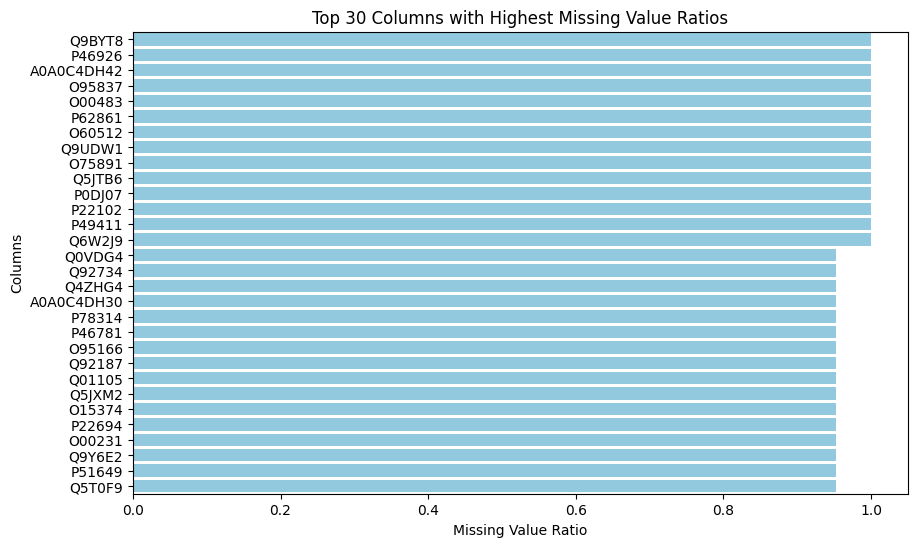

In [23]:
plot_columns_with_highest_missing_ratio(df_proteins_lumbar, 30, True)

In [18]:
def columns_with_zeros(df):
    # Check for zero values in each column
    zero_columns = df.columns[(df == 0).any()]

    # Get the number of zero values in each column
    zero_counts = df[zero_columns].eq(0).sum()

    return zero_columns, zero_counts

In [19]:
zero_columns, zero_counts = columns_with_zeros(df_proteins_ventricular)

In [20]:
df_proteins_ventricular = np.log2(df_proteins_ventricular + 1)

In [21]:
df_proteins_ventricular

,P02768,P02787,P01009,P01024,P0C0L5,P02649,P0DOY2,P00738,P06396,P02647,...,P06732,Q5UCC4,Q9NUM4,P60903,O75369,Q6P995,Q4KWH8,Q5H9L2,Q8N8N7,Q07812
4,0.537394,0.753819,0.452518,0.593544,0.807392,0.602611,0.373652,0.889444,0.619565,0.506054,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.251370,0.375211,0.295762,0.255428,0.251987,0.149827,0.185705,0.068795,0.175800,0.204837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.655270,0.671485,0.645850,0.774611,0.748815,0.608819,0.769037,1.360163,0.627588,0.673332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.503623,0.660571,0.491135,0.664959,0.564215,0.402249,0.389501,0.673259,0.501232,0.540148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.615794,0.844344,0.609561,0.464764,0.939180,1.058507,0.399527,0.447475,0.831365,0.407459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.314786,0.477017,0.372541,0.319075,0.397009,0.393478,0.146062,0.496650,0.344570,0.317306,...,NaN,NaN,0.469715,0.558672,0.338127,NaN,0.205348,NaN,NaN,NaN
183,0.564842,0.720537,0.556185,0.569355,0.707972,0.749505,0.571787,0.754548,0.649110,0.739202,...,NaN,NaN,0.709719,0.802577,0.383814,NaN,0.549997,NaN,NaN,NaN
184,0.635449,0.861266,0.581884,0.731403,0.860953,0.904828,0.411850,0.385028,0.822042,0.552096,...,NaN,NaN,0.621956,0.986159,0.672750,NaN,0.750864,NaN,NaN,NaN
185,0.367939,0.554407,0.348594,0.388831,0.517317,0.359681,0.266479,0.553333,0.395125,0.236652,...,NaN,NaN,0.537025,0.461185,0.426889,NaN,0.249960,NaN,NaN,NaN


In [35]:
def set_max_missingness_per_column(df, threshold=0.5):
    """
    Removes columns with nan values above a threshold.

    :param df: Dataframe-base to remove NaN-heavy columns from.
    :param threshold: Threshold percentage of missingness allowed per column.
    :return: New dataframe without NaN-heavy columns.
    """ 
    nan_percentage = (df.isna().mean()).round(4)
    selected_columns = nan_percentage[nan_percentage <= threshold].index
    return df[selected_columns]

In [36]:
tmt_set_ventricular = df_proteins_all.loc[df_proteins_ventricular.index]["TMT Set"]
tmt_set_lumbar = df_proteins_all.loc[df_proteins_lumbar.index]["TMT Set"]

# MiceForest

In [71]:
import miceforest as mf
from sklearn.decomposition import PCA

ModuleNotFoundError: No module named 'miceforest'

In [104]:
# Create kernel. 
kds = mf.ImputationKernel(
  df_proteins_ventricular_log,
  #save_all_iterations=True,
  datasets=1,
  random_state=1991,
)
kds.mice(
    iterations=1,
    device = "gpu"
)
completed_dataset = kds.complete_data()

In [105]:
completed_dataset

,P02768,P02787,P01009,P01024,P0C0L5,P02649,P0DOY2,P00738,P06396,P02647,...,Q08257,Q56P03,Q9UJ90,P31948,P05107,Q5JXB2,O43707,O75339,O14960,Q07812
4,0.620487,0.810500,0.538556,0.672239,0.853909,0.680424,0.458017,0.917962,0.695606,0.590774,...,0.986791,0.778684,0.728320,1.072510,0.651805,0.616061,0.918165,0.456640,0.749774,0.812273
7,0.323509,0.459653,0.373801,0.328179,0.324219,0.201416,0.245745,0.095985,0.233642,0.268838,...,0.615116,0.203441,0.397901,0.464680,0.308363,0.408898,0.580518,0.171058,0.502049,0.402674
8,0.727067,0.741130,0.718833,0.827503,0.806378,0.686002,0.822964,1.238887,0.702736,0.742724,...,0.877924,0.579138,0.781085,0.946651,0.654677,0.728199,0.836491,0.456640,0.782804,0.745744
9,0.588443,0.731680,0.576411,0.735487,0.645439,0.487743,0.474567,0.742661,0.586147,0.623069,...,1.061787,0.579138,0.553579,1.231436,0.651805,0.694519,1.072981,0.444117,0.749774,0.682027
10,0.692243,0.883108,0.686667,0.550668,0.955447,1.041599,0.484939,0.533538,0.872919,0.493093,...,0.951263,0.740314,0.950150,1.205654,0.873171,0.691961,0.880353,0.653999,0.993267,0.851108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.394828,0.562687,0.456849,0.399527,0.482341,0.478690,0.196685,0.581737,0.427145,0.397591,...,0.610425,0.383005,0.506512,0.667637,0.448910,0.432960,0.514417,0.436427,0.760215,0.483181
183,0.646017,0.782859,0.638014,0.650172,0.772284,0.806947,0.652406,0.811099,0.721688,0.798425,...,1.216744,0.706898,0.716163,1.114221,0.678039,0.743753,0.880353,0.459253,0.867351,0.752094
184,0.709687,0.896284,0.661644,0.791941,0.896041,0.929661,0.497586,0.469915,0.865556,0.634218,...,1.022816,0.908588,0.868213,1.039481,0.633076,0.774211,0.771225,0.581915,1.049594,0.811162
185,0.452004,0.636365,0.431456,0.473871,0.601522,0.443268,0.340824,0.635367,0.480395,0.306439,...,0.600386,0.426365,0.647046,0.686059,0.479293,0.526404,0.594538,0.338596,0.208935,0.638204


In [38]:
pca_median = PCA(n_components=2, svd_solver="randomized")
pca_ventricular = pca_median.fit_transform(df_proteins_ventricular_zeros)

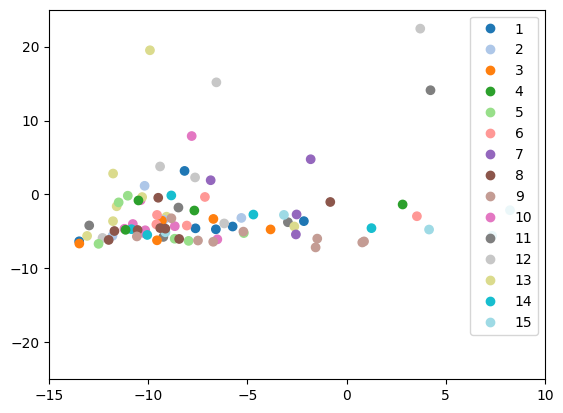

In [40]:
plot = plt.scatter(pca_ventricular[:,0], pca_ventricular[:,1], c=tmt_set_ventricular, cmap = "tab20")
plt.legend(handles=plot.legend_elements()[0], labels=set(tmt_set_ventricular))
plt.xlim(-15, 10)
plt.ylim(-25, 25)
plt.show()

# SimpleImpute & Plots

In [ ]:
from sklearn.manifold import TSNE

In [55]:
def plot_tnse(tsne, c, title):
    plt.scatter(tsne[:, 0], tsne[:,1], c=c, cmap="tab20")
    plt.title("T-SNE plot " + title)
    plt.xlabel("T-SNE_1")
    plt.ylabel("T-SNE_2")
    plt.show()

In [56]:
def apply_tsne(df, n_components = 2, random_state = None, perplexity = 5):
    return TSNE(n_components=n_components, random_state=random_state, perplexity=perplexity).fit_transform(df)

In [66]:
def impute_and_plot(df, c, title):
    imputation_methods = ["mean", "median", "constant"]
    for method in imputation_methods:
        imputer = SimpleImputer(strategy=method, missing_values=np.nan, fill_value=0)
        df_imputed = imputer.fit_transform(df)
        tsne = apply_tsne(df_imputed)
        plot_tnse(tsne, c=c, title=title + " (method = " + method + ")")
        

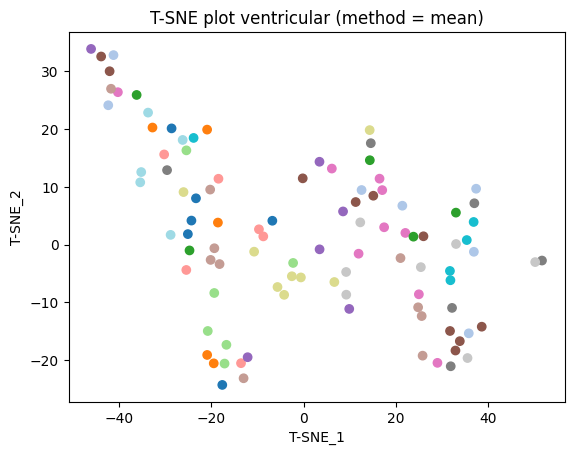

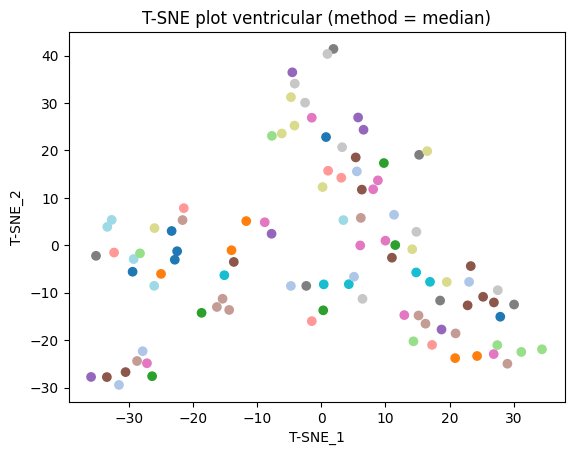

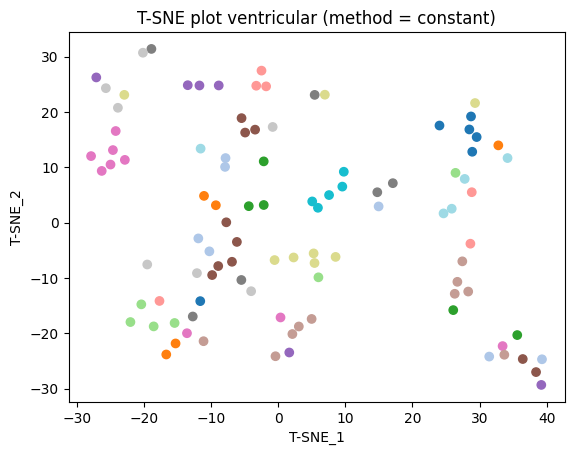

In [67]:
impute_and_plot(df_proteins_ventricular, tmt_set_ventricular, title="ventricular")

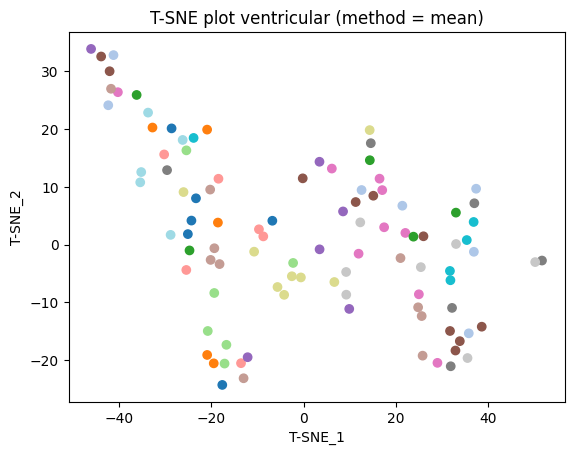

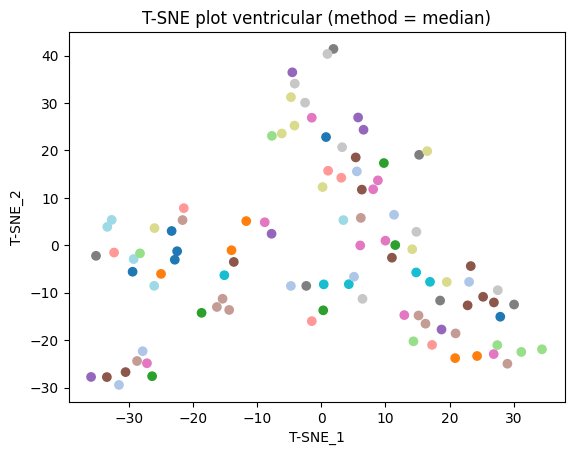

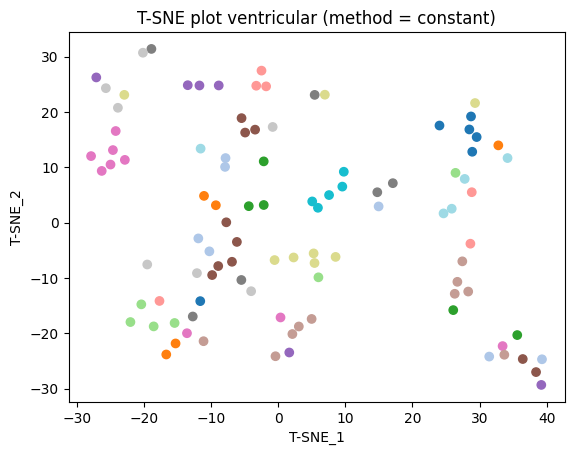

In [70]:
impute_and_plot(df_proteins_ventricular, tmt_set_ventricular, title="ventricular")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['A0A0C4DH42' 'P46926' 'O00483' 'P0DJ07' 'Q6W2J9' 'P22102' 'P62861'
 'Q5JTB6' 'Q9UDW1' 'O60512' 'Q9BYT8' 'P49411' 'O75891' 'O95837']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


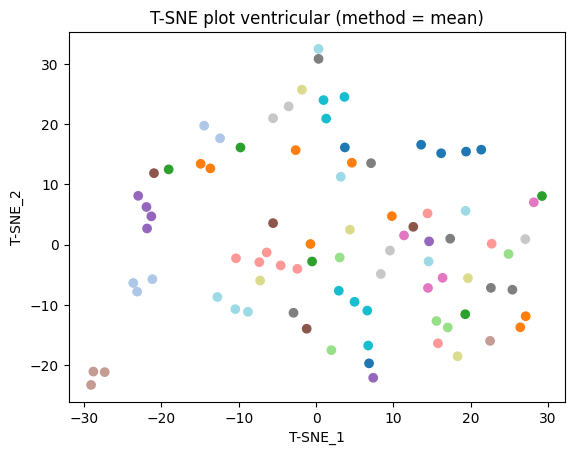

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['A0A0C4DH42' 'P46926' 'O00483' 'P0DJ07' 'Q6W2J9' 'P22102' 'P62861'
 'Q5JTB6' 'Q9UDW1' 'O60512' 'Q9BYT8' 'P49411' 'O75891' 'O95837']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


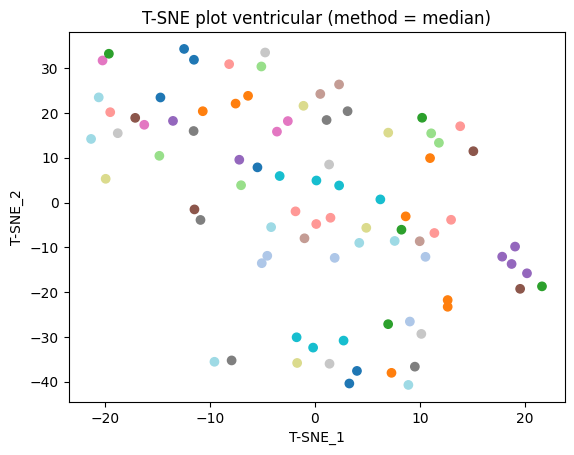

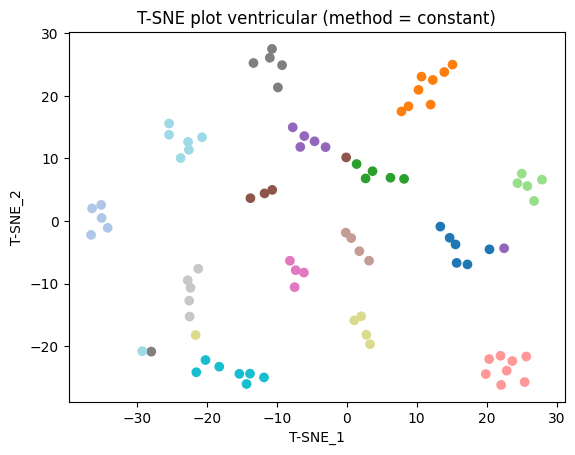

In [68]:
impute_and_plot(df_proteins_lumbar, tmt_set_lumbar, title="lumbar")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['A0A0C4DH42' 'P46926' 'O00483' 'P0DJ07' 'Q6W2J9' 'P22102' 'P62861'
 'Q5JTB6' 'Q9UDW1' 'O60512' 'Q9BYT8' 'P49411' 'O75891' 'O95837']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


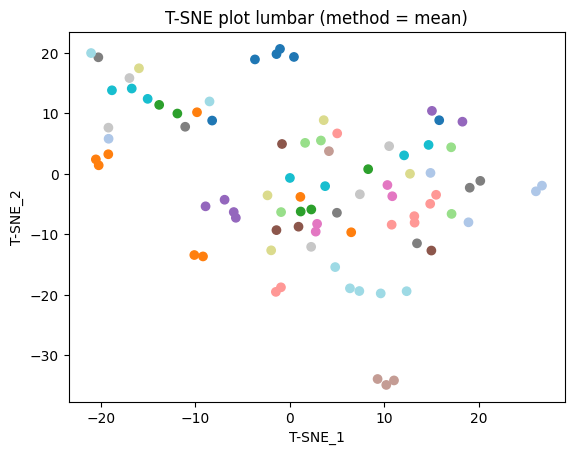

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['A0A0C4DH42' 'P46926' 'O00483' 'P0DJ07' 'Q6W2J9' 'P22102' 'P62861'
 'Q5JTB6' 'Q9UDW1' 'O60512' 'Q9BYT8' 'P49411' 'O75891' 'O95837']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


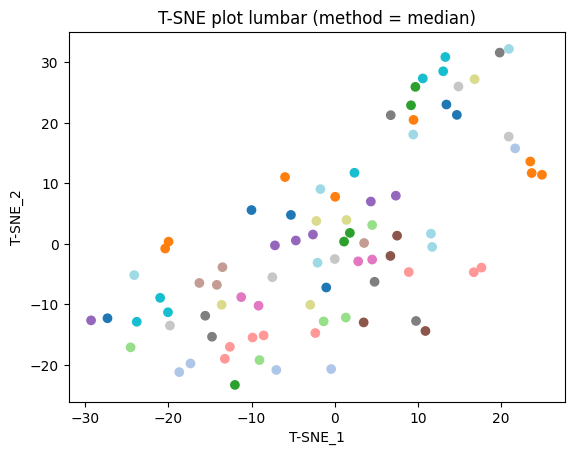

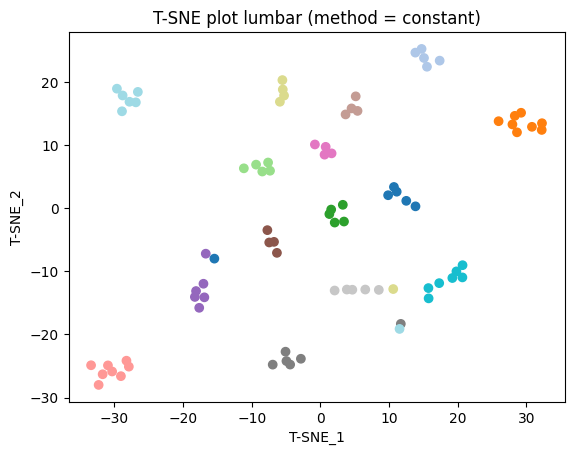

In [69]:
impute_and_plot(df_proteins_lumbar_median, tmt_set_lumbar, title="lumbar")